In [1]:
import sys
import os
sys.path.append("../../sbo")
sys.path.append("monitoring-ecosystem-resilience")

import sys
import matplotlib.pyplot as plt
import numpy as np

import torch

import pyro
import pyro.contrib.gp as gp
import pyro.distributions as dist
from pyro.nn import PyroSample, PyroModule
from pyro.infer import Trace_ELBO

# Import SBO
import sbo
import utilities

# Import pyveg
from pyveg.scripts.optimize_gee_threshold import optimize_threshold

CONST_STDOUT = sys.stdout

In [2]:
class ParametricMeanFn(PyroModule):
    
    def __init__(self):
        super().__init__()
        
        self.beta = PyroSample(dist.Uniform(-100, 100))
        
    def forward(self, X):
        
        middle = 383.0
        X_adjusted = X - middle
        
        result = torch.pow(X_adjusted + self.beta, 2) / middle**2 - 1
              
        return result.squeeze()


In [3]:
param = ParametricMeanFn()

In [4]:
x_space = torch.linspace(0, 765, 766)

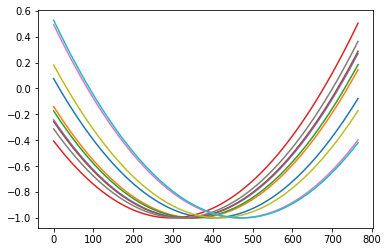

In [8]:
for i in range(10):
    plt.plot(x_space, param(x_space))